<a href="https://colab.research.google.com/github/akonaje/site/blob/main/ERD_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [ ]:
## load google drive training dataset here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/TrainModelDataset'

detect			    google-colab-config.yaml  labels		   tasks.gdoc
ERD-grade-prediction.ipynb  images		      old-run-with-yolo8n  weights


In [ ]:
ROOT_DIR = '/content/gdrive/My Drive/TrainModelDataset'

In [ ]:
!ls '/content/gdrive/My Drive/TrainModelDataset/detect/restart-train-2/weights/'


best.pt  last.pt


In [ ]:
import os
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8m.yaml")  # build a new model from YAMLa

#Load already trained, saved model
model = YOLO('/content/gdrive/My Drive/TrainModelDataset/detect/restart-train-2/weights/best.pt')


In [ ]:
# Fine-tuning the restart train 2 model

results = model.train(data=os.path.join(ROOT_DIR, "google-colab-config.yaml"),
                      epochs=15,
                      batch=16,
                      conf=0.6,
                      iou=0.6,
                      lr0=0.0001,
                      augment=True,
                      model="/content/gdrive/My Drive/TrainModelDataset/detect/restart-train-2/weights/best.pt")  # Path to the trained model weights





Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/gdrive/My Drive/TrainModelDataset/detect/restart-train-2/weights/best.pt, data=/content/gdrive/My Drive/TrainModelDataset/google-colab-config.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.6, iou=0.6, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /content/gdrive/.shortcut-targets-by-id/1mK_qUFB82ueiA94KARAgCddLHDbAZRXF/TrainModelDataset/labels/train.cache... 134 images, 0 backgrounds, 0 corrupt: 100%|██████████| 134/134 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/.shortcut-targets-by-id/1mK_qUFB82ueiA94KARAgCddLHDbAZRXF/TrainModelDataset/labels/train.cache... 134 images, 0 backgrounds, 0 corrupt: 100%|██████████| 134/134 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      7.99G      1.521      1.272      2.018        114        640: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        134       1550      0.507       0.28      0.396      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      7.95G      1.471      1.183      1.955        129        640: 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        134       1550      0.568      0.102      0.333      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.99G      1.441      1.154       1.91        132        640: 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:02<00:03,  1.11s/it]

# Object Detection Model Testing

In [ ]:
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2  # or use PIL for image handling


image 1/1 /content/gdrive/My Drive/TrainModelDataset/images/test/1.png: 224x640 3 entitys, 12 attributes, 65.2ms
Speed: 2.9ms preprocess, 65.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)


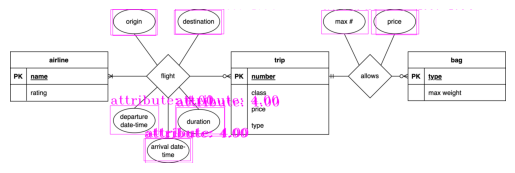

<class 'list'>
[['attribute', (742, 4, 1085, 191)], ['attribute', (2663, 10, 3013, 184)], ['attribute', (2296, 10, 2640, 183)], ['attribute', (987, 953, 1330, 1116)], ['attribute', (1210, 9, 1559, 186)], ['attribute', (1219, 0, 1576, 183)], ['attribute', (1225, 724, 1580, 918)], ['attribute', (998, 948, 1346, 1132)], ['attribute', (2697, 0, 2997, 189)], ['attribute', (1219, 709, 1583, 934)], ['attribute', (738, 710, 1096, 920)], ['attribute', (757, 0, 1075, 194)]]


In [ ]:
def object_detection(model, img_path):

  #run inference
  results = model(test_image_path, conf=0.6, iou=0.85)

  #read image
  img = cv2.imread(test_image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Define colors for bounding boxes
  color_dict = {
        'entity': (255, 0, 0),  # Red
        'weak-entity': (0, 255, 0),  # Green
        'relationship': (0, 0, 255),  # Blue
        'identifying-relationship': (255, 174, 66),  # Yellow
        'attribute': (255, 0, 255)  # Magenta
    }

  detected_objects = []  # List to store detected objects

  # Extract bounding boxes and object details
  boxes = results[0].boxes


  for box in boxes:
      x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
      class_id = int(box.cls)
      label = model.names[class_id]
      color = color_dict.get(label, (255, 255, 255))

      confidence = int(box.cls)

      #detected_objects.append([label, (x1, y1, x2, y2)])


      #Arrays for NMS
      confidences = []
      bboxes = []
      labels = []

      #NMS
      bboxes.append([x1, y1, x2, y2])
      confidences.append(confidence)
      labels.append(label)

      # Convert to numpy array
      bboxes = np.array(bboxes)
      confidences = np.array(confidences)

      #Apply NMS
      indices = cv2.dnn.NMSBoxes(bboxes.tolist(), confidences.tolist(), score_threshold=0.6, nms_threshold=0.4)

      # Draw the bounding box

      if len(indices) > 0:
        for i in indices.flatten():
          x1, y1, x2, y2 = bboxes[i]
          confidence = confidences[i]
          label = labels[i]
          color = color_dict.get(label, (255, 255, 255))

          #draw bounding box
          cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

          # Add the label and confidence on top of the bounding box
          labeltext = f"{label}: {confidence:.2f}"
          cv2.putText(img, labeltext, (x1, y1 - 10), cv2.FONT_HERSHEY_TRIPLEX, 3, color, 2)

          detected_objects.append([label, (x1, y1, x2, y2)])

  #Display img
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print(type(detected_objects))

  #Return list
  return detected_objects


test_image_path = "/content/gdrive/My Drive/TrainModelDataset/images/test/1.png"
detected_objects = object_detection(model, test_image_path)

# Output the detected objects
print(detected_objects)


# OCR Model

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


In [ ]:
!pip install easyocr

In [ ]:
#imports
import easyocr
import cv2 #for images
import numpy as np
from PIL import Image

In [ ]:

# Define the path to the image

# Run inference
results = model(test_image_path, conf=0.6, iou=0.85)




image 1/1 /content/gdrive/My Drive/TrainModelDataset/images/test/2.png: 576x640 2 entitys, 4 relationships, 1 identifying-relationship, 35.7ms
Speed: 4.8ms preprocess, 35.7ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 640)


In [ ]:
def detect_lines(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

  lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)


  if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                # Check if the line is horizontal (y1 and y2 are almost the same)
                if abs(y1 - y2) < 5:  # Adjust threshold for detecting horizontal lines
                    # Draw the line (as an underscore)
                    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green line as underscore
  return image


def run_ocr(crop_img, reader):
  results = reader.readtext(crop_img, detail=0)
  return results


def ocr_module(img_path, detected_objects):

  # Initialize the OCR reader
    img = cv2.imread(img_path)

    #pre-process image
    img_with_lines = detect_lines(img)


    reader = easyocr.Reader(['en'])

    ocr_results = []

    base_name = os.path.splitext(os.path.basename(img_path))[0]
    output_txt_path = f"{base_name}.txt"

    with open(output_txt_path, 'w') as file:
      for obj in detected_objects:
        label = obj[0]
        x1, y1, x2, y2 = obj[1]

        # Ensure coordinates are within image boundaries
        height, width, _ = img.shape
        x1 = max(0, min(x1, width - 1))
        y1 = max(0, min(y1, height - 1))
        x2 = max(0, min(x2, width - 1))
        y2 = max(0, min(y2, height - 1))


        #draw bounding boxes
        color = color_dict.get(label, (255, 255, 255))
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        labeltext = f"{label}"
        cv2.putText(img, labeltext, (x1, y1 - 10), cv2.FONT_HERSHEY_TRIPLEX, 3, color, 2)

        #crop to the bounding box
        box_img = img[y1:y2, x1:x2]

        #Run OCR
        output = run_ocr(box_img, reader)

        ocr_results.append([label] + output)

        file.write(f"{[label] + output}\n")

    return ocr_results

test_image_path = "/content/gdrive/My Drive/TrainModelDataset/images/test/1.png"
function = ocr_module(test_image_path, detected_objects)

# Show the image with bounding boxes
##plt.imshow(img)
#plt.axis('off')
#plt.show()

for result in function:
  print(result)

  #Read the image


['attribute', 'Qtiin']
['attribute', 'price']
['entity', 'airline', 'PK', 'rating']
['attribute', 'max #']
['attribute', 'arrival date-', 'time']
['attribute', 'Lsation']
['entity', 'bag', 'PK', 'type', 'max weight']
['attribute', 'Esation']
['attribute', 'duration']
['attribute', 'arrival date-', 'time']
['entity', 'trip', 'PK', 'class', 'e', 'price', 'type']
['attribute', 'price']
['attribute', 'duration', 'HAn##L']
['attribute', 'departure', 'date-time']
['attribute', 'Ofigin']


In [ ]:
#Post-process the results of the OCR

def merge_adj_words(ocr_output, threshold=50):

  merged_line = []
  current_word = ocr_output[0][0]  # Start with the first word

  for i in range(1, len(ocr_output)):
      prev_box = ocr_output[i-1][1]
      curr_box = ocr_output[i][1]
        # Check if words are horizontally adjacent within the threshold
      if abs(curr_box[0] - prev_box[2]) <= threshold:  # Compare x-coordinates
          current_word += "_" + ocr_output[i][0]  # Merge with underscore
      else:
          merged_line.append(current_word)
          current_word = ocr_output[i][0]  # Start a new word

  merged_line.append(current_word)  # Add the last word
  return merged_line

def process_ocr(function):

  processed_results = []
  current_box = ocr_results[0][1]
  current_words = []

  for item in ocr_results:
      word = item[0]
      box = item[1]
      if box == current_box:
            # If the word is in the same bounding box, add it to current_words
          current_words.append((word, box))
      else:
            # Process the previous bounding box before moving to the next one
          merged_words = merge_adj_words(current_words)
          processed_results.extend(merged_words)
          current_words = [(word, box)]  # Start with the new box
          current_box = box  # Update the box

    # Process the last bounding box
  if current_words:
      merged_words = merge_adj_words(current_words)
      processed_results.extend(merged_words)

  return processed_results


processed_result = process_ocr(function)
for line in processed_result:
  print(line)

relationship
relationship
relationship
identifying-relationship
relationship
entity
entity
relationship
relationship
relationship
identifying-relationship
relationship
entity
entity
relationship
relationship
relationship
identifying-relationship
relationship
entity
entity
relationship
relationship
relationship
identifying-relationship
relationship
entity
entity
relationship
relationship
relationship
identifying-relationship
relationship
entity
entity
relationship
relationship
relationship
identifying-relationship
relationship
entity
entity
relationship
relationship
relationship
identifying-relationship
relationship
entity
entity


In [ ]:
import easyocr
reader = easyocr.Reader(['en'])

Sold by
Return Flight
Outbound Flight
Allowed Bag Type
Operated by
Airline
PK
airline
name
rating
Trip
PK
trip_
number
class
price
max
bags
origin
destination
['relationship', 'Sold by']
['relationship', 'Return Flight']
['relationship', 'Outbound Flight']
['identifying-relationship', 'Allowed Bag Type']
['relationship', 'Operated by']
['entity', 'Airline', 'PK', 'airline', 'name', 'rating']
['entity', 'Trip', 'PK', 'trip_', 'number', 'class', 'price', 'max', 'bags', 'origin', 'destination']


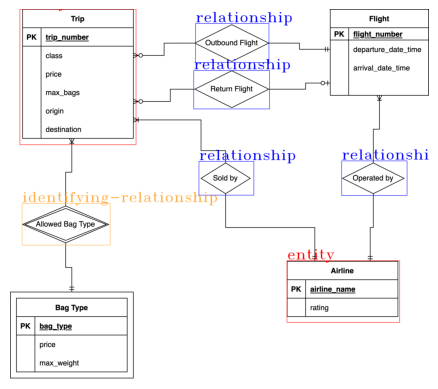

In [ ]:
#Use OCR to read text from the detected bounding boxes

def run_ocr(img):
   results = reader.readtext(img, detail=0)
   return results

ocr_results = []

#Iterate over bounding boxes
boxes = results[0].boxes

for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    class_id = int(box.cls)
    label = model.names[class_id]

    #Draw bounding boxes over img
    color = color_dict.get(label, (255, 255, 255))
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    labeltext = f"{label}"
    cv2.putText(img, labeltext, (x1, y1 - 10), cv2.FONT_HERSHEY_TRIPLEX , 3, color, 2)

    # Run OCR on the detected region
    box_img = img[y1:y2, x1:x2] #ensure box is numpy array
    output = run_ocr(box_img)

    for i in output:
      print(i)

    #text = merge_by_proximity(output)

    ocr_results.append([label] + output)

# Show the image with bounding boxes
plt.imshow(img)
plt.axis('off')
#plt.show()


# Print OCR results
for result in ocr_results:
    print(result)








In [ ]:
!cp -r /content/runs ROOT_DIR


#**testing something...**


image 1/1 /content/gdrive/My Drive/TrainModelDataset/images/test/2.png: 576x640 2 entitys, 4 relationships, 1 identifying-relationship, 75.5ms
Speed: 15.9ms preprocess, 75.5ms inference, 13.2ms postprocess per image at shape (1, 3, 576, 640)


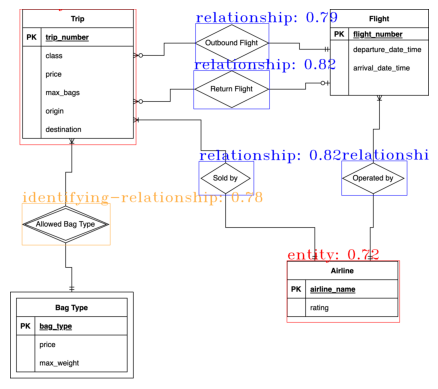

Label: relationship, Confidence: 0.82, OCR Text: ['Sold by']
Label: relationship, Confidence: 0.82, OCR Text: ['Return Flight']
Label: relationship, Confidence: 0.79, OCR Text: ['Outbound Flight']
Label: identifying-relationship, Confidence: 0.78, OCR Text: ['Allowed Bag Type']
Label: relationship, Confidence: 0.72, OCR Text: ['Operated by']
Label: entity, Confidence: 0.72, OCR Text: ['Airline', 'PK', 'airline', 'name', 'rating']
Label: entity, Confidence: 0.68, OCR Text: ['Trip', 'PK', 'trip_', 'number', 'class', 'price', 'max', 'bags', 'origin', 'destination']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import easyocr

# Initialize EasyOCR Reader
ocr = easyocr.Reader(['en'])

# Define the path to your trained model weights
weights_path = "runs/detect/train/weights/best.pt"

# Load the trained model
model = YOLO(weights_path)

# Define the path to the image
test_image_path = "/content/gdrive/My Drive/TrainModelDataset/images/test/2.png"

# Run inference
results = model(test_image_path, conf=0.6, iou=0.85)

# Read the image
img = cv2.imread(test_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define colors for bounding boxes
color_dict = {
    'entity': (255, 0, 0),  # Red
    'weak-entity': (0, 255, 0),  # Green
    'relationship': (0, 0, 255),  # Blue
    'identifying-relationship': (255, 174, 66),  # Yellow
    'attribute': (255, 0, 255)  # Magenta
}

# Extract bounding boxes and run OCR
ocr_results = []

boxes = results[0].boxes
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    class_id = int(box.cls)
    confidence = float(box.conf)
    label = model.names[class_id]

    color = color_dict.get(label, (255, 255, 255))
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
    labeltext = f"{label}: {confidence:.2f}"
    cv2.putText(img_rgb, labeltext, (x1, y1 - 10), cv2.FONT_HERSHEY_TRIPLEX , 3, color, 2)

    # Run OCR on the detected region
    box_img = img[y1:y2, x1:x2]
    box_img_pil = Image.fromarray(cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB))
    text = run_ocr(box_img_pil, [0, 0, x2 - x1, y2 - y1])
    ocr_results.append((label, confidence, text))

# Show the image with bounding boxes
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Print OCR results
for result in ocr_results:
    label, confidence, text = result
    print(f"Label: {label}, Confidence: {confidence:.2f}, OCR Text: {text}")
